In [16]:
import os
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import median_abs_deviation as mad
from scipy.stats import spearmanr, pearsonr, linregress
import numpy as np
import gseapy as gp
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

In [2]:
tang_adata = sc.read_h5ad("/hpc/users/divagt01/watanabe/Divagar/transcriptomic_data/Tang/tumor_adata_normalized_nescore.h5ad")
chan_adata = sc.read_h5ad("/hpc/users/divagt01/watanabe/Divagar/transcriptomic_data/Chan/chan_adata_nescore.h5ad")

In [34]:
chan_adata

AnnData object with n_obs × n_vars = 49685 × 22216
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'mito_frac', 'RBP_frac', 'batch', 'patient', 'tissue', 'treatment', 'procedure', 'SCLC_subtype', 'SCLC_subtype_plus_TP53_RB1_wt', 'pval_SCLC-A', 'pval_SCLC-N', 'pval_SCLC-P', 'NEUROD genes', 'MHCI_PRESENTATION', 'MHCII_PRESENTATION', 'SCLC_major_subtype_of_sample', 'clusters', 'treatment_categorized', 'recurrent_cluster', 'histo', 'clusters_fine', 'n_genes', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'pearson_correlation_to_ne', 'pearson_correlation_to_nonne', 'NE_score', 'NE_status'
    var: 'knnDREMI|PLCG2', 'PLCG2_modules', 'AXONOGENESIS', 'NEURON_DIFFERENTIATION', 'NEUROPEPTIDE_RECEPTOR', 'EMT', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'NE_status_colors', 'cells_removed', 'diffmap_ev

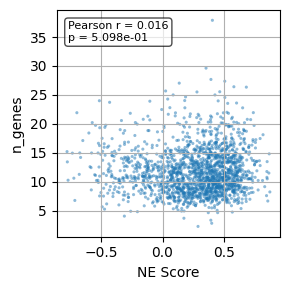

In [31]:
df = tang_adata.obs[['NE_score', 'pct_counts_ribo']].dropna()
x = df['NE_score']
y = df['pct_counts_ribo']

# Check for constant values (zero variance)
if x.nunique() < 2 or y.nunique() < 2:
    print("Error: One of the variables has zero variance; cannot compute Pearson correlation.")
else:
    # Compute Pearson correlation
    r, p = pearsonr(x, y)

    # Create scatter plot
    plt.figure(figsize=(3, 3))
    plt.scatter(x, y, alpha=0.5, s=5, edgecolor='none')
    plt.xlabel('NE Score')
    plt.ylabel('n_genes')

    # Annotate stats
    plt.text(0.05, 0.95, f'Pearson r = {r:.3f}\np = {p:.3e}',
             transform=plt.gca().transAxes, fontsize=8,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    plt.grid(True)
    plt.tight_layout()
    plt.show()

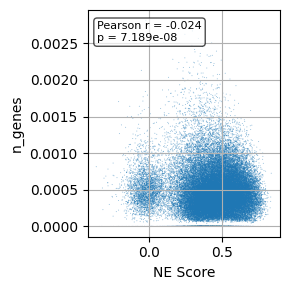

In [41]:
df = chan_adata.obs[['NE_score', 'RBP_frac']].dropna()
x = df['NE_score']
y = df['RBP_frac']

# Check for constant values (zero variance)
if x.nunique() < 2 or y.nunique() < 2:
    print("Error: One of the variables has zero variance; cannot compute Pearson correlation.")
else:
    # Compute Pearson correlation
    r, p = pearsonr(x, y)

    # Create scatter plot
    plt.figure(figsize=(3, 3))
    plt.scatter(x, y, alpha=0.5, s=0.5, edgecolor='none')
    plt.xlabel('NE Score')
    plt.ylabel('n_genes')

    # Annotate stats
    plt.text(0.05, 0.95, f'Pearson r = {r:.3f}\np = {p:.3e}',
             transform=plt.gca().transAxes, fontsize=8,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    plt.grid(True)
    plt.tight_layout()
    plt.show()

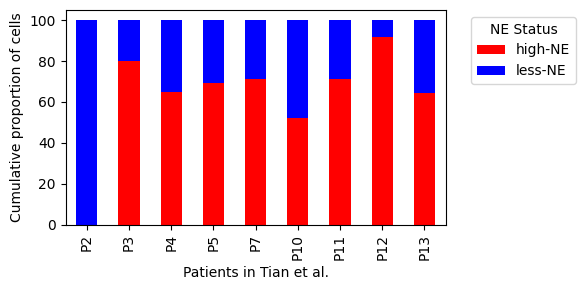

In [42]:
proportions = pd.crosstab(tang_adata.obs['patient'], tang_adata.obs['NE_status'], normalize='index') * 100
proportions = proportions.reset_index()
proportions = proportions.rename(columns={
    'NE': 'high-NE',
    'non-NE': 'less-NE'
})

ax = proportions.set_index('patient').plot(kind='bar', stacked=True, figsize=(6, 3), color=['red','blue'])

# Customize plot
ax.set_ylabel('Cumulative proportion of cells')
ax.set_xlabel('Patients in Tian et al.')
ax.legend(title='NE Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display plot
plt.tight_layout()
#plt.show()
plt.savefig("/hpc/users/divagt01/watanabe/Divagar/scRNAseq_pipeline/figures/tian_nestatus_patients.png", dpi=600,bbox_inches='tight')

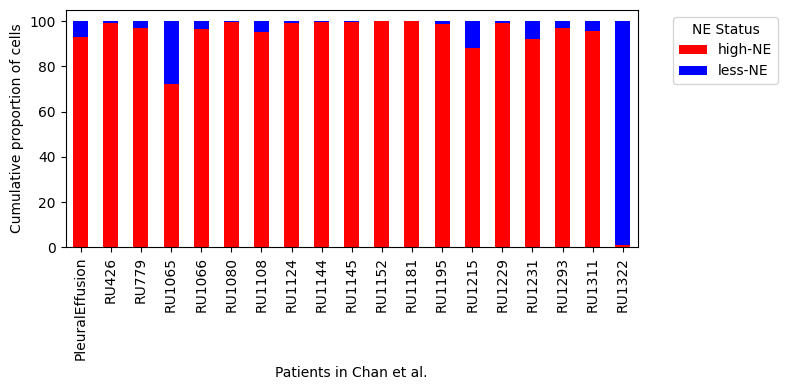

In [43]:
proportions = pd.crosstab(chan_adata.obs['patient'], chan_adata.obs['NE_status'], normalize='index') * 100
proportions = proportions.reset_index()
proportions = proportions.rename(columns={
    'NE': 'high-NE',
    'non-NE': 'less-NE'
})

ax = proportions.set_index('patient').plot(kind='bar', stacked=True, figsize=(8, 4), color=['red','blue'])

# Customize plot
ax.set_ylabel('Cumulative proportion of cells')
ax.set_xlabel('Patients in Chan et al.')
ax.legend(title='NE Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display plot
plt.tight_layout()
#plt.show()
plt.savefig("/hpc/users/divagt01/watanabe/Divagar/scRNAseq_pipeline/figures/chan_nestatus_patients.png", dpi=600,bbox_inches='tight')